In [28]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import cross_validate
import tqdm
import seaborn as sns
# sns.set()

In [29]:
file = open('./data/shashlik_61_pulses.txt', 'r')
data = file.readlines()
data = np.array([list(map(float, experiment.split())) for experiment in data])

X = data[:, 2:]
y_baseline = data[:, 1]
y = data[:, 0]

In [30]:
plt.rcParams.update(
    {
        'text.usetex': False,
        'font.family': 'stixgeneral',
        'mathtext.fontset': 'stix',
    }
)

In [31]:
FONTSIZE=15
LABEL_FONTSIZE = 14

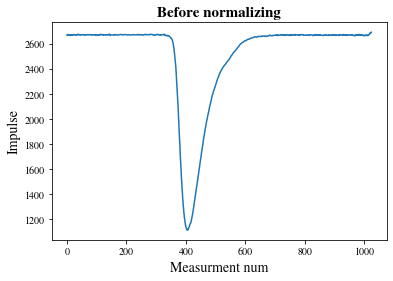

In [32]:
plt.title("Before normalizing", weight='bold', fontsize=FONTSIZE)
sns.lineplot(data=X[1])
plt.xlabel("Measurment num", fontsize=LABEL_FONTSIZE)
plt.ylabel("Impulse", fontsize=LABEL_FONTSIZE)
plt.show()

In [33]:
X = np.array([experiment - np.max(experiment) for experiment in X])
X = np.array([experiment/-np.min(experiment) for experiment in X])

y = np.round(y)
y = y.astype(int)

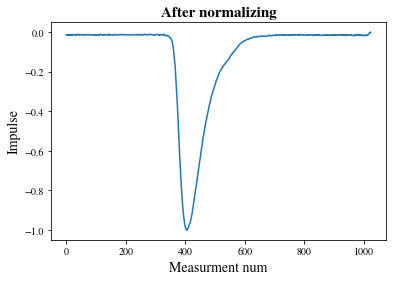

In [34]:
plt.title("After normalizing", weight='bold', fontsize=FONTSIZE)
sns.lineplot(data=X[1])
plt.xlabel("Measurment num", fontsize=LABEL_FONTSIZE)
plt.ylabel("Impulse", fontsize=LABEL_FONTSIZE)
plt.show()

In [35]:
def signal_cyclic_shift(signal, tau):
    signal_start = signal[:-tau]
    
    new_signal = np.concatenate([signal[-tau:], signal_start])
    
    return new_signal

In [36]:
mean_ref_time = int(y.mean())
X_shifted = np.array([signal_cyclic_shift(signal, mean_ref_time - y[i]) for i, signal in enumerate(X, 0)])

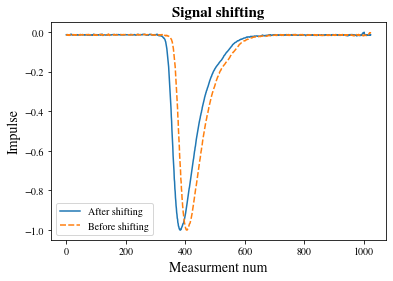

In [37]:
plt.title("Signal shifting", weight='bold', fontsize=FONTSIZE)
sns.lineplot(data=[X_shifted[1], X[1]])
plt.xlabel("Measurment num", fontsize=LABEL_FONTSIZE)
plt.ylabel("Impulse", fontsize=LABEL_FONTSIZE)
plt.legend(["After shifting", "Before shifting"])
plt.show()

384


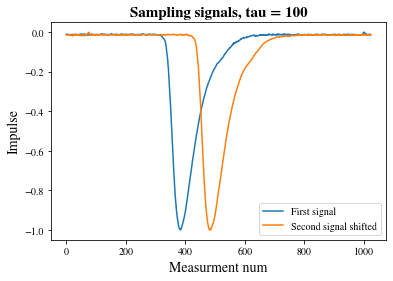

In [38]:
tau = 100

first_signal = X_shifted[0]
second_signal_shifted = signal_cyclic_shift(X_shifted[1], tau)

print(np.argmin(first_signal))
plt.title("Sampling signals, tau = " + str(tau), weight='bold', fontsize=FONTSIZE)
sns.lineplot(data=first_signal)
sns.lineplot(data=second_signal_shifted)
plt.xlabel("Measurment num", fontsize=LABEL_FONTSIZE)
plt.ylabel("Impulse", fontsize=LABEL_FONTSIZE)
plt.legend(["First signal", "Second signal shifted"])
plt.show()

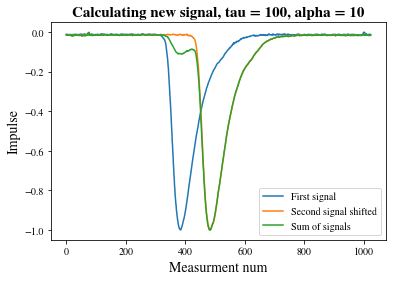

In [39]:
tau = 100
alpha = 10

first_signal = X_shifted[0]
second_signal = X_shifted[1]
second_signal_shifted = signal_cyclic_shift(second_signal, tau)
multiple_signal = first_signal + alpha*second_signal_shifted
multiple_signal /= -np.min(multiple_signal)
plt.title("Calculating new signal, tau = " + str(tau) + ", alpha = " + str(alpha), weight='bold', fontsize=FONTSIZE)
sns.lineplot(data=first_signal)
sns.lineplot(data=second_signal_shifted)
sns.lineplot(data=multiple_signal)
plt.xlabel("Measurment num", fontsize=LABEL_FONTSIZE)
plt.ylabel("Impulse", fontsize=LABEL_FONTSIZE)
plt.legend(["First signal", "Second signal shifted", "Sum of signals"])
plt.show()

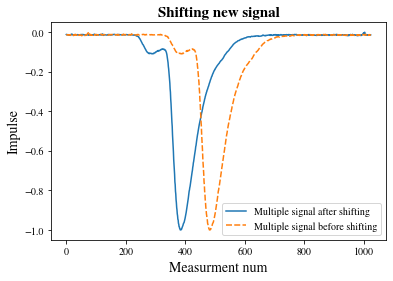

In [40]:
new_argmin = 384

multiple_signal_shifted = signal_cyclic_shift(multiple_signal, new_argmin - np.argmin(multiple_signal))
plt.title("Shifting new signal", weight='bold', fontsize=FONTSIZE)
sns.lineplot(data=[multiple_signal_shifted, multiple_signal])
plt.xlabel("Measurment num", fontsize=LABEL_FONTSIZE)
plt.ylabel("Impulse", fontsize=LABEL_FONTSIZE)
plt.legend(["Multiple signal after shifting", "Multiple signal before shifting"])
plt.show()

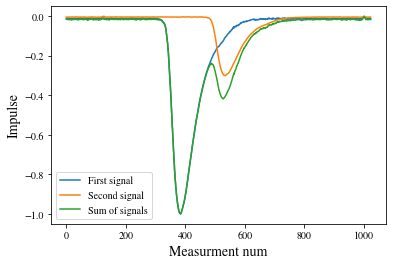

In [41]:
tau = 150
alpha = 0.3

first_signal = X_shifted[0]
second_signal = X_shifted[1]
second_signal_shifted = signal_cyclic_shift(second_signal, tau)
multiple_signal = first_signal + alpha*second_signal_shifted
multiple_signal /= -np.min(multiple_signal)
sns.lineplot(data=first_signal)
sns.lineplot(data=second_signal_shifted*alpha)
sns.lineplot(data=multiple_signal)
plt.xlabel("Measurment num", fontsize=LABEL_FONTSIZE)
plt.ylabel("Impulse", fontsize=LABEL_FONTSIZE)
plt.legend(["First signal", "Second signal", "Sum of signals"])
plt.show()

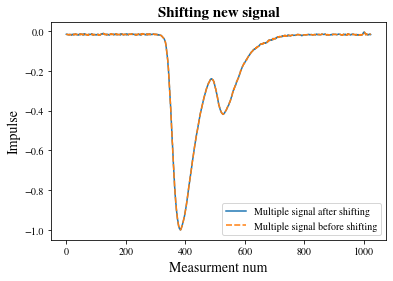

In [42]:
new_argmin = 384

multiple_signal_shifted = signal_cyclic_shift(multiple_signal, new_argmin - np.argmin(multiple_signal))
plt.title("Shifting new signal", weight='bold', fontsize=FONTSIZE)
plt.xlabel("Measurment num", fontsize=LABEL_FONTSIZE)
plt.ylabel("Impulse", fontsize=LABEL_FONTSIZE)
sns.lineplot(data=[multiple_signal_shifted, multiple_signal])
plt.legend(["Multiple signal after shifting", "Multiple signal before shifting"])

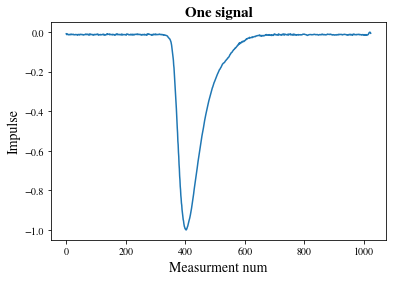

In [49]:
plt.title("One signal", fontsize=FONTSIZE, weight='bold')
plt.xlabel("Measurment num", fontsize=LABEL_FONTSIZE)
plt.ylabel("Impulse", fontsize=LABEL_FONTSIZE)
sns.lineplot(data=X[0])

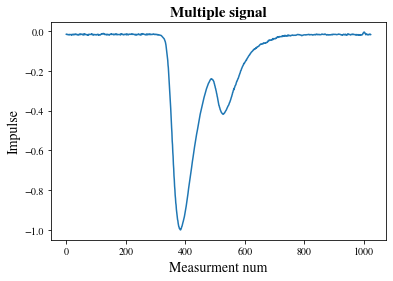

In [50]:
plt.title("Multiple signal", fontsize=FONTSIZE, weight='bold')
plt.xlabel("Measurment num", fontsize=LABEL_FONTSIZE)
plt.ylabel("Impulse", fontsize=LABEL_FONTSIZE)
sns.lineplot(data=multiple_signal_shifted)

In [45]:
mean_ref_time

166

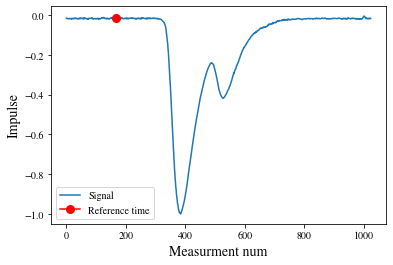

In [46]:
plt.plot(multiple_signal)
# plt.axvline(x=y[0], color='r')
plt.plot([int(mean_ref_time)], [multiple_signal_shifted[mean_ref_time]], color='r', marker='o', markersize=8)
plt.legend(['Signal', 'Reference time'])
plt.xlabel("Measurment num", fontsize=LABEL_FONTSIZE)
plt.ylabel("Impulse", fontsize=LABEL_FONTSIZE)
plt.show()

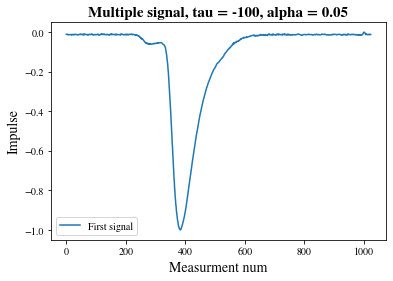

In [66]:
tau = -100
alpha = 0.05

plt.title("Multiple signal, tau = %d, alpha = %0.2f" %(tau, alpha), fontsize=FONTSIZE, weight='bold')
first_signal = X_shifted[0]
second_signal = X_shifted[1]
second_signal_shifted = signal_cyclic_shift(second_signal, tau)
multiple_signal = first_signal + alpha*second_signal_shifted
multiple_signal /= -np.min(multiple_signal)
multiple_signal = signal_cyclic_shift(multiple_signal, new_argmin - np.argmin(multiple_signal))
# sns.lineplot(data=first_signal)
# sns.lineplot(data=second_signal_shifted*alpha)
sns.lineplot(data=multiple_signal)
plt.xlabel("Measurment num", fontsize=LABEL_FONTSIZE)
plt.ylabel("Impulse", fontsize=LABEL_FONTSIZE)
plt.legend(["First signal", "Second signal", "Sum of signals"])
plt.show()